In [1]:
#Python Default 

import pickle
import time

#Essentials

import numpy as np
from bs4 import BeautifulSoup
import requests
import func_timeout
import pandas as pd

#from objproxies import *

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

#Qiskit

from qiskit.circuit import Gate
from qiskit import transpile
from qiskit.providers.models import *
from qiskit_ibm_runtime.fake_provider import *
from qiskit.providers.fake_provider import *

## Qiskit Nature
    
from qiskit_nature.units import *   #ANGSTROM

from qiskit_nature.second_q.drivers import *    #PySCFDriver

from qiskit_nature.second_q.mappers import * #JordanWignerMapper

from qiskit_nature.second_q.algorithms import GroundStateEigensolver

from qiskit_nature.second_q.problems import ElectronicStructureProblem

from qiskit_nature.second_q.circuit.library import *  #Ansatz, HF

## Qiskit Algorithms
    
from qiskit_algorithms.minimum_eigensolvers import VQE as  VQE_algorithms   #VQE
 
from qiskit_algorithms.optimizers import *    #SLSQP

from qiskit.circuit.library import EfficientSU2   #EfficientSU2

## Qiskit Primitives

from qiskit.primitives import Estimator as Estimator_Nature

from qiskit_aer.primitives.estimator import Estimator as Estimator_Aer

## Qiskit Noise Models

from qiskit_aer.noise import NoiseModel

from qiskit.providers.fake_provider import *

##Qiskit Runtime IBM

from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options

from qiskit_ibm_runtime import Estimator, EstimatorV2    #Estimator

## Braket

from braket.tracking import Tracker
from qiskit_braket_provider import *


%matplotlib widget

KeyboardInterrupt: 

In [2]:
provider = BraketProvider()
local_simulator = BraketLocalBackend()
sv1_simualtor = provider.get_backend("SV1")

In [ ]:
provider.backends()

In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
noise_model = NoiseModel.from_backend(backend)

In [ ]:
Estimator(local_simulator).options

In [ ]:
EstimatorV2(local_simulator).options

In [3]:
class Estimator_answer:
    
    def __init__(self) -> None:
        
        self._resultado = None
        self._billing = None
        self._callback = []
        
    def set_result(self, resultado):
        
        self._resultado = resultado
    
    def set_billing(self, billing):
            
            self._billing = billing
            
    def set_callback(self, callback):
            
            self._callback.append(callback)
    

In [4]:
def salvar(a):
    with open(f'Códigos/Gabriel/GroundState6/dados/{a}.pickle', 'wb') as f:
        pickle.dump(eval(a), f) 

def abrir(a):
    with open(f'Códigos/Gabriel/GroundState6/dados/{a}.pickle', 'rb') as f:
        return pickle.load(f)
    
def Estimator_intervalo(intervalo, base = "sto3g", optimizer = COBYLA(), noise = None, backend = None, session = None, mapper = JordanWignerMapper(), shots = 2048, seed = 1):
        
    for a in intervalo: 
        
        driver = PySCFDriver(
            atom= f"H 0 0 0; H 0 0 {a}",
            basis=base,
            charge=0,
            spin=0,
            unit=DistanceUnit.ANGSTROM,
        )
        
        es_problem = driver.run()
                    
        estimator = Estimator(backend = backend, session = session, options = {'shots': shots})

        mapper = mapper
        
        ansatz = UCCSD(
            es_problem.num_spatial_orbitals,
            es_problem.num_particles,
            mapper,
            initial_state=HartreeFock(
                es_problem.num_spatial_orbitals,
                es_problem.num_particles,
                mapper,
            ),
        )

        vqe_solver = VQE_algorithms(estimator, ansatz, optimizer)
        
        vqe_solver.initial_point = [0.0] * ansatz.num_parameters
        
        calc = GroundStateEigensolver(mapper, vqe_solver)
        
        res = calc.solve(es_problem)
        
        # yield [a, res.groundenergy + res.nuclear_repulsion_energy], calc.get_qubit_operators(es_problem)
        return ansatz.assign_parameters(vqe_solver.compute_minimum_eigenvalue(calc.get_qubit_operators(es_problem)[0]).optimal_point)

In [ ]:
a = Estimator_intervalo([1], backend = local_simulator, shots = 100, seed = 1)

In [ ]:
a.decompose().draw('mpl')

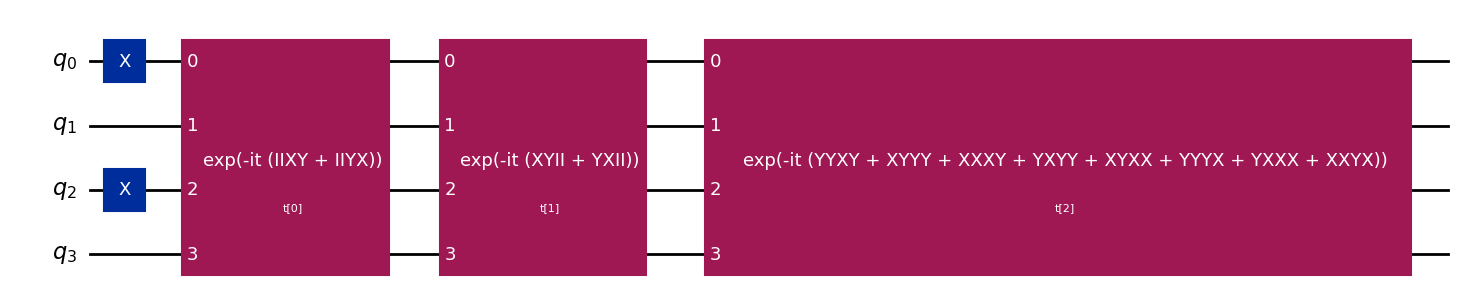

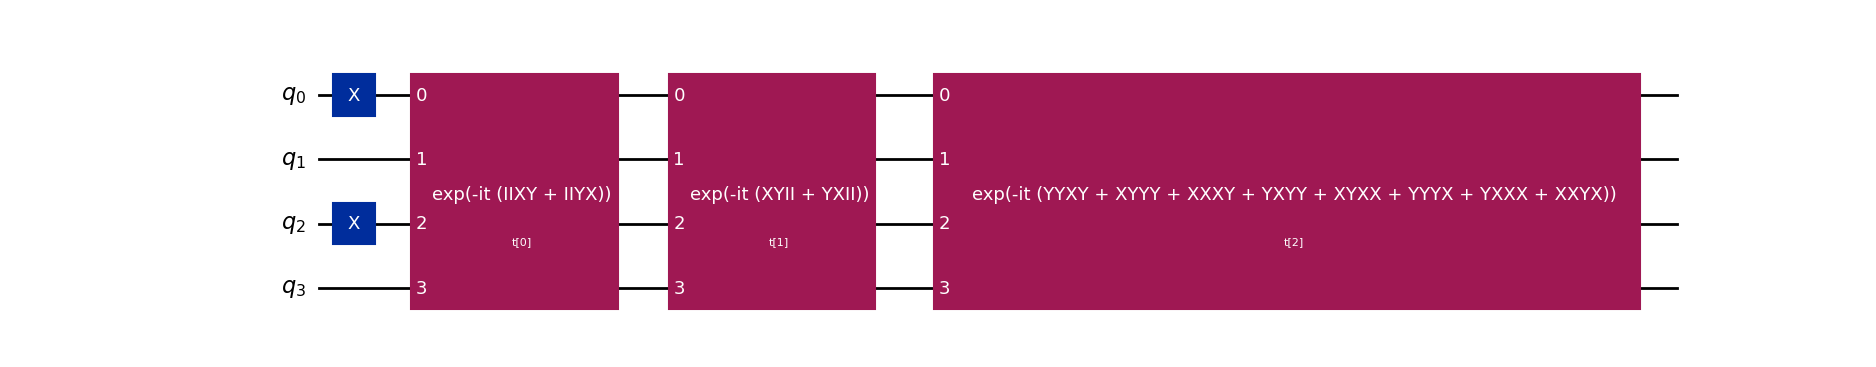

In [5]:
driver = PySCFDriver(
    atom= f"H 0 0 0; H 0 0 1",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

ansatz.decompose().draw('mpl')

In [ ]:
transpile(ansatz, backend = local_simulator).draw('mpl')

In [ ]:
transpile(ansatz, backend = FakeVigoV2()).draw('mpl')

In [6]:
circuit = transpile(ansatz, backend = local_simulator)

gates = []

for i, (gate, qubits, etc) in enumerate(circuit.data):
    
    gates.append(gate.name)

set_gates = list(set(gates))

set_gates.sort(key = lambda x: gates.count(x), reverse = True)

print("Gates present: " + " ".join(set_gates), end = "\n\n")
print(f"Number of gates: {len(gates)}\n\nDistribution of gates: \n")

for i in set_gates:
    
    print(i, gates.count(i))

Gates present: cx u rz h

Number of gates: 99

Distribution of gates: 

cx 56
u 26
rz 12
h 5


In [8]:
driver = PySCFDriver(
    atom= f"H 0 0 0; H 0 0 1",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

estimator = Estimator(backend = local_simulator, options = {'shots': 2000})

mapper = JordanWignerMapper()

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

vqe_solver = VQE_algorithms(estimator, ansatz, COBYLA())

vqe_solver.initial_point = [0.0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe_solver)

minimum_eigenvalue = vqe_solver.compute_minimum_eigenvalue(calc.get_qubit_operators(es_problem)[0])

/tmp/ipykernel_7026/2978663112.py:11: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  estimator = Estimator(backend = local_simulator, options = {'shots': 2000})


In [ ]:
print(type(minimum_eigenvalue))

In [16]:
type(transpile(minimum_eigenvalue.optimal_circuit.decompose(), local_simulator))

qiskit.circuit.quantumcircuit.QuantumCircuit

In [9]:
circuit = transpile(minimum_eigenvalue.optimal_circuit.decompose(), local_simulator)

gates = []

for i, (gate, qubits, etc) in enumerate(circuit.data):
    
    gates.append(gate.name)

set_gates = list(set(gates))

set_gates.sort(key = lambda x: gates.count(x), reverse = True)

print("Gates present: " + " ".join(set_gates), end = "\n\n")
print(f"Number of gates: {len(gates)}\n\nDistribution of gates: \n")

for i in set_gates:
    
    print(i, gates.count(i))

Gates present: cx u rz h

Number of gates: 99

Distribution of gates: 

cx 56
u 26
rz 12
h 5
